# Exploration of Amazon consumer products reviews
## by Kyle McMillan

## Preliminary Wrangling

> This investigation explores the Amazon US marketplace reviews dataset containing approximately 7 million unique reviews.

In [332]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import random
random.seed(42)
import statistics

%matplotlib inline

In [93]:
#Data is loaded from a TSV file. Bad lines are dropped as fixing these manually will take too much time 
#for the low number of lines with errors.
reviews=pd.read_csv(r"amazon_reviews_multilingual_US_v1_00.tsv", sep="\t", error_bad_lines=False, header=0)

b'Skipping line 3231472: expected 15 fields, saw 22\n'
b'Skipping line 3509762: expected 15 fields, saw 22\n'
b'Skipping line 4018793: expected 15 fields, saw 22\n'
b'Skipping line 4280173: expected 15 fields, saw 22\nSkipping line 4290596: expected 15 fields, saw 22\n'
b'Skipping line 4331421: expected 15 fields, saw 22\nSkipping line 4340267: expected 15 fields, saw 22\nSkipping line 4341665: expected 15 fields, saw 22\nSkipping line 4386155: expected 15 fields, saw 22\nSkipping line 4388098: expected 15 fields, saw 22\n'
b'Skipping line 4408027: expected 15 fields, saw 22\nSkipping line 4442615: expected 15 fields, saw 22\n'
b'Skipping line 4519623: expected 15 fields, saw 22\n'
b'Skipping line 4525797: expected 15 fields, saw 22\nSkipping line 4543519: expected 15 fields, saw 22\n'
b'Skipping line 4587726: expected 15 fields, saw 22\nSkipping line 4589301: expected 15 fields, saw 22\nSkipping line 4634393: expected 15 fields, saw 22\n'
b'Skipping line 4666168: expected 15 fields, s

In [94]:
#View the unique items in the product category.
reviews.product_category.unique()

array(['Books', 'Music', 'Video', 'Video DVD', 'Toys', 'Tools',
       'Office Products', 'Video Games', 'Software',
       'Digital_Music_Purchase', 'Home Entertainment', 'Electronics',
       'Digital_Ebook_Purchase', 'Digital_Video_Download', 'Kitchen',
       'Camera', 'Outdoors', 'Musical Instruments', 'Sports', 'Watches',
       'PC', 'Home', 'Wireless', 'Beauty', 'Baby', 'Home Improvement',
       'Apparel', 'Shoes', 'Lawn and Garden', 'Mobile_Electronics',
       'Health & Personal Care', 'Grocery', 'Luggage',
       'Personal_Care_Appliances', 'Automotive', 'Mobile_Apps',
       'Furniture', '2012-12-22', 'Pet Products'], dtype=object)

In [95]:
#View the data that has a product category of a date.
reviews.query("product_category == '2012-12-22'")

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
1852794,US,49422747,R2T9JZNQ996WRC,1568652240,569473707,Emma (Large Print)\tBooks\t5\t0\t0\tN\tY\tFoll...,2012-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#View the data string in the product title
list(reviews[reviews.review_id=="R2T9JZNQ996WRC"].product_title)

['Emma (Large Print)\tBooks\t5\t0\t0\tN\tY\tFollows Austen\'s book closley\tI have the movie with Ms Paltrow starring, so I bought the book to see how it matched. Very well done.\t2012-12-22\nUS\t7209000\tR1MZOZGBLVKYVP\tB003E8P9G0\t446279348\tThe Kane Chronicles, Book One: The Red Pyramid\tDigital_Ebook_Purchase\t5\t0\t0\tN\tN\tso....\tmy brother read this book and he was instantly addicted to it so i started reading it on my kindle and i goten adddicted to it too. i would say that it is a must read.Questions or Comments my kindle email is  haili@kindle.com\t2012-12-22\nUS\t49422747\tR31UI3EECPWNVA\tB002EWD0I6\t647475881\tLark Rise to Candleford: Season 1\tVideo DVD\t4\t0\t0\tN\tY\tGood\tI thought this would be more of theprevious characters of Cranford, but not to be.  This was good enough for me to order the 2nd season.\t2012-12-22\nUS\t7209000\tR2UXMYNK8AEEVR\tB005CRQ4GU\t632021160\tThe Third Wheel (Diary of a Wimpy Kid, Book 7)\tDigital_Ebook_Purchase\t5\t1\t2\tN\tN\tso....\tI LOV

In [97]:
#Drop this line as it appears to have been parsed wrong because of the extra "/t" in the title column and there are a lot
#of extra reviews in this title string.
reviews.drop(reviews.loc[reviews.product_category.isin(['2012-12-22'])].index, inplace=True)
reviews.product_category.unique()

array(['Books', 'Music', 'Video', 'Video DVD', 'Toys', 'Tools',
       'Office Products', 'Video Games', 'Software',
       'Digital_Music_Purchase', 'Home Entertainment', 'Electronics',
       'Digital_Ebook_Purchase', 'Digital_Video_Download', 'Kitchen',
       'Camera', 'Outdoors', 'Musical Instruments', 'Sports', 'Watches',
       'PC', 'Home', 'Wireless', 'Beauty', 'Baby', 'Home Improvement',
       'Apparel', 'Shoes', 'Lawn and Garden', 'Mobile_Electronics',
       'Health & Personal Care', 'Grocery', 'Luggage',
       'Personal_Care_Appliances', 'Automotive', 'Mobile_Apps',
       'Furniture', 'Pet Products'], dtype=object)

In [98]:
print(reviews.info(null_counts=True ))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6900885 entries, 0 to 6900885
Data columns (total 15 columns):
marketplace          6900885 non-null object
customer_id          6900885 non-null int64
review_id            6900885 non-null object
product_id           6900885 non-null object
product_parent       6900885 non-null int64
product_title        6900885 non-null object
product_category     6900885 non-null object
star_rating          6900885 non-null float64
helpful_votes        6900885 non-null float64
total_votes          6900885 non-null float64
vine                 6900885 non-null object
verified_purchase    6900885 non-null object
review_headline      6900811 non-null object
review_body          6900810 non-null object
review_date          6900562 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 842.4+ MB
None


In [99]:
#Investigate the reason that a few reviews have NaN for a date
dateless = reviews.loc[reviews['review_date'].isin(reviews.review_date.dropna().unique())==False]
dateless.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
142642,US,52767614,RJBEAQJ92LS61,B00003CXDG,765637830,Mission: Impossible 2 (Widescreen Edition),Video DVD,2.0,0.0,0.0,N,N,Technology is not always beneficial -\tespecia...,2001-03-08,NaN
186564,US,50374272,R2LXX6V7B1PICZ,B00005OB0A,321992753,Fever,Music,5.0,0.0,0.0,N,N,The music you were playing really blew my mind...,2001-10-25,NaN
217791,US,42627253,R1CRCYSML85MB4,B00005JKZQ,167276143,Showtime,Video DVD,5.0,5.0,6.0,N,N,It's............SHOWTIME!!!!!\tShowtime is the...,2002-03-16,NaN
235044,US,52442862,R1YZIXBH6AVF4E,B00000JMQC,79142420,Return to Oz [VHS],Video,5.0,6.0,7.0,N,N,The Wizard of Oz it is not--should not be!\tFo...,2002-06-10,NaN
239621,US,47692344,R12KVFMZYPXNF6,B00003CWL6,304141589,American Beauty (1999),Video DVD,5.0,1.0,3.0,N,N,"It's just STUFF!!!\t\\American Beauty\\"" is in...",2002-06-30,NaN


In [100]:
#It seems there was an issue during the reading of the TSV file and the review titles used a tab space. Where read_csv was
#looking for a "\t" delimiter

#Investigate the titles for each of the reviews to see if there is any thing unusual
#As this is a very large and long list, a random sample of 5 were chosen.
DL_random_list = random.sample(list(dateless.review_id), 5)
for i in DL_random_list:
    print(re.split("\t", list(dateless[dateless.review_id==i].review_headline)[0])[0])

The Lone survivor
My teacher said I'm a loser, I give a f**k if you feel me..
Love the boys,  but not this movie
What did you expect?.....Lord Tennyson?
Oldie, but goodie


In [101]:
#Investigate the body of the dateless reviews to see if there is anything unusual.
for i in DL_random_list:
    print(re.split("\t", list(dateless[dateless.review_id==i].review_headline)[0])[1:])

["[[ASIN:0316067601 Lone Survivor: The Eyewitness Account of Operation Redwing and the Lost Heroes of SEAL Team 10]]<br /><br />Excellent narration. Inspiring, patriotic, and courageous. Also, one lucky SEAL. As an American, I am honored, and humbled by his 'call to service\\\\.<br />Bravo."]
['.. I\'m gonna follow my heart.\\\\ <BR>My favorite line on this album off of the highest point on this album, \\\\"Get Em High,\\\\" featuring epic rappers Talib Kweli and Common. I loved it because it influences me and inspires me, but after learning that this was the genius that produced five star tracks such as Poppa Was A Playa by Nas and Izzo by Jay-Z, I wanted to pick up this solely for the beats. I wasn\'t as interested in hearing him as a rapper, because I hadn\'t even heard Through the Wire or All Falls Down at the time. But, I wasn\'t disappointed at all, this guy is one of the best \\\\"new artist\\\\" rappers I\'ve heard in a long time. This guy knows how to write intellectual flows 

In [102]:
#It seems like there are a lot of other reviews mixed into the body of some of the dateless reviews.
#As there are a very large number of total reviews, and wrangling the data to sort out the 300 or so that need to be fixed,
#I have decided to drop these rows.
reviews.drop(dateless.index, inplace=True)
reviews.loc[reviews['review_date'].isin(reviews.review_date.dropna().unique())==False]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date


In [103]:
#Investigate the reviews where there is no headline to see if there is anything unusual.
reviews.loc[reviews['review_headline'].isin(reviews.review_headline.dropna().unique())==False]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
144995,US,51263804,RRR6EK045G5YL,630438551X,212477251,Romeo & Juliet [VHS],Video,5.0,4.0,8.0,N,N,NaN,I consider myself to be a pretty much diehard ...,2001-03-21
274671,US,34490235,R25MC0QXPV5CRZ,6305949980,664817538,The Nightmare Before Christmas (Special Edition),Video DVD,4.0,1.0,6.0,N,N,NaN,"Three words, \\""BEST MOVIE EVER.\\"" If you hav...",2002-12-11
373447,US,23532323,R1MNPI81JJ62NI,B0000DD7NL,868764779,The Diary of Alicia Keys,Music,5.0,0.0,2.0,N,N,NaN,I love this cd! My favorite two songs are:<br...,2004-01-12
450489,US,43058957,RIHK7J9KBB62V,B00005V3Z4,681790048,Donnie Darko (Widescreen Edition),Video DVD,4.0,3.0,8.0,N,N,NaN,It actually is pretty hard to classify this mo...,2004-11-18
515646,US,34215909,R1HAKDWL5X86B9,B00014NE62,59241661,Maurice - The Merchant Ivory Collection,Video DVD,4.0,2.0,3.0,N,N,NaN,"Goes at quite a steady pace, however, this is ...",2005-08-12
522262,US,36882963,R2VEG37XSHHQMO,B0002Y4TTC,773850099,Blind Guardian - Imaginations Through the Look...,Video DVD,3.0,1.0,8.0,N,N,NaN,This is a beautifully packaged 2-disc DVD edit...,2005-09-04
546262,US,24610674,R3NODAYWJSH67Y,B000BM6AVA,828472430,Hypnotize,Music,5.0,2.0,4.0,N,N,NaN,"It's a warm, peaceful afternoon in the upstand...",2005-11-28
550148,US,16196376,R1DUI7MJ3FPONG,B0001YRVN4,745272701,Star Wars Trilogy (A New Hope / The Empire Str...,Video DVD,5.0,4.0,10.0,N,N,NaN,What's all this I hear about people complainin...,2005-12-12
567259,US,22947656,R1ABIC2ULD2TCB,B000AP2ZDK,577609284,Donuts,Music,5.0,112.0,124.0,N,N,NaN,"This isn't Dilla's best work, far from it real...",2006-02-16
568389,US,42224700,R3QMAWGAVYTR9F,B00001U0E1,475263130,Shakespeare in Love (Miramax Collector's Series),Video DVD,4.0,0.0,1.0,N,N,NaN,"I am a Shakespeare buff, so I didn't find this...",2006-02-20


In [104]:
#Investigate the reviews where there is no body to see if there is anything unusual.
reviews.loc[reviews['review_body'].isin(reviews.review_body.dropna().unique())==False]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
4362503,US,44409249,R28HX7V41NGPGD,B00IFMHZ58,731881208,Veronica Mars,Digital_Video_Download,4.0,0.0,0.0,N,Y,Four Stars,NaN,2014-07-14
4364915,US,34483539,R1KRVATE3RM685,0545615402,160159764,Hogwarts Library (Harry Potter),Books,5.0,0.0,1.0,N,Y,Five Stars,NaN,2014-07-14
4492736,US,14326822,R3QYW87GDRRNAF,B004S82OAE,235122690,CCNA Cisco Certified Network Associate Study G...,Digital_Ebook_Purchase,5.0,0.0,1.0,N,Y,Five Stars,NaN,2014-08-03
4646674,US,20596625,R12WMFWQ96MK9E,B00HPYMVD8,108613172,The Target (Will Robie),Digital_Ebook_Purchase,4.0,0.0,0.0,N,Y,Four Stars,NaN,2014-08-29
4867197,US,11236181,R1ZS0RW3SLED36,B0096YJDNQ,454110113,Distant Suns (max) - Unleash your inner astron...,Mobile_Apps,5.0,0.0,0.0,N,Y,Five Stars,NaN,2014-10-07
4967822,US,3152188,R1RGMJWY7KCMFF,B003MYYJD0,120446899,Invicta Men's 6981 Pro Diver Analog Swiss Chro...,Watches,5.0,94.0,102.0,N,Y,Five Stars,NaN,2014-10-24
4990204,US,8149238,R221BRF51GRMNT,B004GJDQT8,36653526,Amazon Underground,Mobile_Apps,4.0,5.0,6.0,N,Y,Four Stars,NaN,2014-10-28
5155825,US,33444040,R2XT5Y4GSMFGBJ,B000LXQVA4,535123469,Fisher-Price Rainforest Jumperoo,Baby,5.0,0.0,0.0,N,N,Five Stars,NaN,2014-11-25
5166126,US,44256154,RK1UNP8GPEEKV,B002IIY6X4,795348432,Homesick,Music,5.0,4.0,4.0,N,Y,Five Stars,NaN,2014-11-27
5190776,US,32311114,R1Q33KCFX6EZKX,B001XVD21Y,818712447,The Departed,Digital_Video_Download,5.0,8.0,9.0,N,Y,Five Stars,NaN,2014-11-30


Looking at the 2 sub tables of the bodyless and titleless reviews, it seems like there were no parsing errors with these but rather people simply did not write anything in these fields when writing their review.  
As such, I will keep these as they are and not remove them.  

There were a few lines that were dropped, these were to save time with this dataset. In total there are around 7 million reviews in this data set, and some need to be fixed manually. These rows of data of approximatley 1000 reviews were dropped as the final table has slightly more than 6.9Million rows.

In [105]:
#As this dataset is only for the US marketplace and all of these values are "US" this column is dropped.
reviews.drop("marketplace", inplace=True, axis=1)

In [106]:
#Check for duplicate rows.
sum(reviews.duplicated())

0

In [107]:
#Convert columns to the correct data type.
reviews['review_date']=pd.to_datetime(reviews.review_date)
reviews['vine'] = reviews.vine.map({'N':False, 'Y':True}).astype(bool)
reviews['star_rating']=pd.to_numeric(reviews.star_rating, downcast="integer")
reviews['helpful_votes']=pd.to_numeric(reviews.helpful_votes, downcast="integer")
reviews['total_votes']=pd.to_numeric(reviews.total_votes, downcast="integer")
reviews['verified_purchase'] = reviews.verified_purchase.map({'N':False, 'Y':True}).astype(bool)
reviews['customer_id'] = reviews.customer_id.astype(str)
reviews['product_parent'] = reviews.product_parent.astype(str)

In [108]:
#High level overview of the data shape and composition.
print(reviews.shape)
print(reviews.info(null_counts=True ))
print(reviews.head(10))

(6900562, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6900562 entries, 0 to 6900885
Data columns (total 14 columns):
customer_id          6900562 non-null object
review_id            6900562 non-null object
product_id           6900562 non-null object
product_parent       6900562 non-null object
product_title        6900562 non-null object
product_category     6900562 non-null object
star_rating          6900562 non-null int8
helpful_votes        6900562 non-null int16
total_votes          6900562 non-null int16
vine                 6900562 non-null bool
verified_purchase    6900562 non-null bool
review_headline      6900488 non-null object
review_body          6900487 non-null object
review_date          6900562 non-null datetime64[ns]
dtypes: bool(2), datetime64[ns](1), int16(2), int8(1), object(8)
memory usage: 572.5+ MB
None
  customer_id       review_id  product_id product_parent  \
0    53096384   R63J84G1LOX6R  1563890119      763187671   
1    53096399  R1BALOA11Z06MT

In [109]:
#Save a sample of the table to upload to github, as the original file is far to large to be uploaded.
reviews.sample(n=10000, random_state=42).to_csv(r'amazon_reviews_sample.csv', index=False)

In [110]:
#Satistics of review ratings
print(reviews[["star_rating","helpful_votes","total_votes"]].describe())

        star_rating  helpful_votes   total_votes
count  6.900562e+06   6.900562e+06  6.900562e+06
mean   4.306589e+00   2.044490e+00  3.251608e+00
std    1.146197e+00   3.184562e+01  3.634051e+01
min    1.000000e+00   0.000000e+00  0.000000e+00
25%    4.000000e+00   0.000000e+00  0.000000e+00
50%    5.000000e+00   0.000000e+00  0.000000e+00
75%    5.000000e+00   1.000000e+00  2.000000e+00
max    5.000000e+00   2.755000e+04  2.872700e+04


In [111]:
print("Number of unique customers:", len(reviews.customer_id.unique()))
print("Number of unique goods:", len(reviews.product_parent.unique()))
print("Number of unique catergories:", len(reviews.product_category.unique()))

Number of unique customers: 4097672
Number of unique goods: 16309
Number of unique catergories: 38


In [116]:
sum(reviews.verified_purchase)

5032988

x=reviews.customer_id.value_counts()
y=x[x >5].index.tolist()
reviews.loc[reviews['customer_id'].isin(y)]

reviews.groupby('customer_id').count() 

### What is the structure of your dataset?

> The cleaned dataset contains 6,900,562 unique reviews with 14 features (customer_id, review_id, product_id, product_parent, product_title, product_category, star_rating, helpful_votes, total_votes, vine, verified_purchase, review_headline, review_body, review_date).    
Most of the columns are objects. Some are unique identifiers to either a product, category or the review (customer_id, review_id, product_id); some are strings relating to the the product such as the name of the items, its category or the review contents (product_title, product_category, review_headline, review_body).  
The ratings of each review along with the helpfullness of each review are intergers (star_rating, helpful_votes, total_votes).  
Two columns are boolian as they are either Y(yes) or N(no) (vine, verifited_purchase).  
The date of the review is in datetime format (review_date).  


### What are the main features of interest in your dataset?

>There are a few aspects, I am interested in investigating.   
* I'm interested in seeing if there is a relationship between vine reviewers and non-vine reviewers - do they make a difference?  
* I also want to see if certian people are more likely to leave good reviews only, bad reviews only, or do they cover both aspects?  
* Is there any relationship between the contents of a review and the number of helpful votes?  
* Are helpful votes only on good or bad reviews?
* Do certian words in a title make for a more helpful review?  
* Is there are relationship between the date and types of reviews given?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am expecting that the review rating will be one of the most prominent features to be used. Regarding the contents of a review and the number of helpful votes, the review title and review body. For this I am expecting that long reviews will be more helpful to people over shorter revews.

## Univariate Exploration

> First I want to look at the number of reviews per customer.

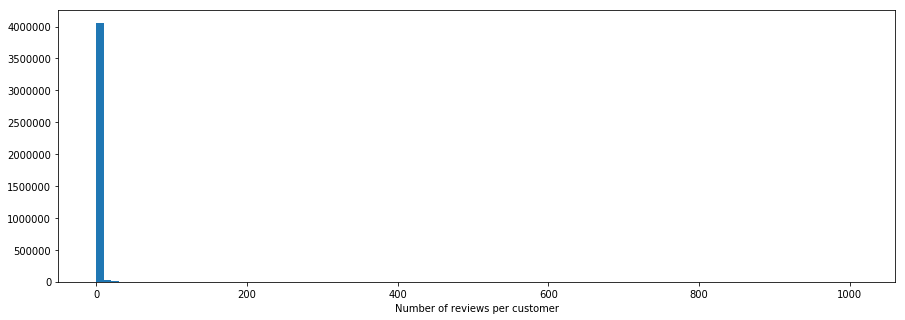

In [442]:
#First plotted on a standard scale
reviews_per_cus = reviews.customer_id.value_counts().tolist()
binsize = 10
bins = np.arange(0, reviews_per_cus[0]+binsize, binsize)

#As the first bin has almost 4
plt.figure(figsize=[15, 5])
(n, bins, patches) = plt.hist(reviews_per_cus, bins = bins)
plt.xlabel('Number of reviews per customer')
plt.show()

In [443]:
#Since the first bin has a lot of points within it, we can check the data from the histogram bins.
n

array([4.056726e+06, 3.024200e+04, 5.689000e+03, 2.072000e+03,
       9.460000e+02, 5.240000e+02, 3.650000e+02, 2.540000e+02,
       1.750000e+02, 1.260000e+02, 8.100000e+01, 5.900000e+01,
       4.500000e+01, 4.500000e+01, 5.200000e+01, 3.200000e+01,
       2.000000e+01, 1.500000e+01, 2.300000e+01, 2.500000e+01,
       1.400000e+01, 1.200000e+01, 1.000000e+01, 1.300000e+01,
       1.000000e+01, 9.000000e+00, 4.000000e+00, 7.000000e+00,
       4.000000e+00, 5.000000e+00, 5.000000e+00, 9.000000e+00,
       1.000000e+00, 3.000000e+00, 1.000000e+00, 4.000000e+00,
       5.000000e+00, 3.000000e+00, 6.000000e+00, 2.000000e+00,
       0.000000e+00, 1.000000e+00, 0.000000e+00, 2.000000e+00,
       0.000000e+00, 0.000000e+00, 5.000000e+00, 1.000000e+00,
       2.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 1.000000e+00, 2.000000e+00, 0.0000

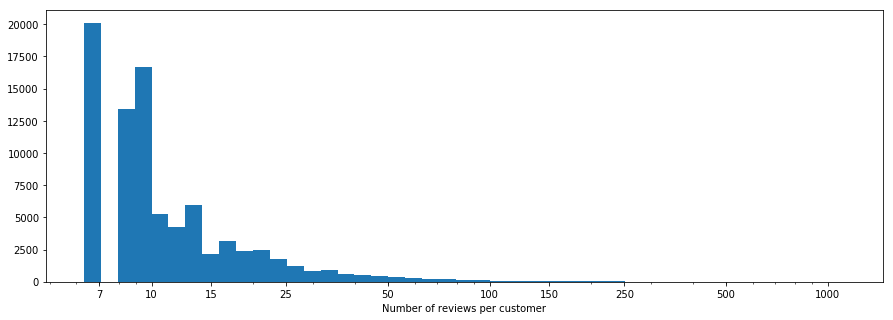

In [444]:
#The above histogram and its bin values show that there's a long tail in the distribution, that goes out quite 
#far so I'll move it to a log scale.
log_binsize = 0.05
bins = 10 ** np.arange(0.8, np.log10(reviews_per_cus[0])+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(reviews_per_cus, bins = bins)
plt.xscale('log')
plt.xticks([7e0, 1e1, 1.5e1, 2.5e1, 5e1, 1e2, 1.5e2, 2.5e2, 5e2, 1e3], ['7', '10', '15', '25', '50', '100', '150', '250', '500', '1000'])
plt.xlabel('Number of reviews per customer')
plt.show()

In [333]:
#General statistics of the number of reviews per person.
print("Mean:",statistics.mean(reviews_per_cus))
print("Median:",statistics.median(reviews_per_cus))
print("Mode:",statistics.mode(reviews_per_cus))
print("stdev:",statistics.stdev(reviews_per_cus))
print("Variance:",statistics.variance(reviews_per_cus))

Mean: 1.6840200972649837
Median: 1.0
Mode: 1
stdev: 3.509075317929728
Variance: 12.313609586903622


As there are a lot of customers who only made 1 review, it skews the data heavily. Approximately there are 3.9 million customers that made only 1 review. 

In [445]:
#Selection of customers who make 5 reviews or more.
x = reviews.customer_id.value_counts()
y = x[x >= 5].index.tolist()
two_or_more = reviews.loc[reviews['customer_id'].isin(y)]

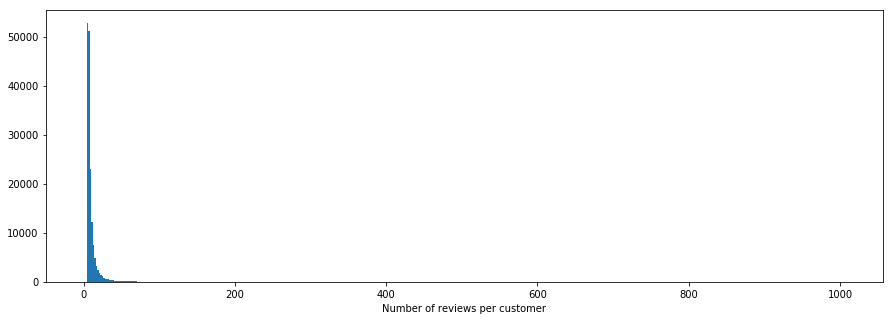

In [446]:
#First plotted on a standard scale
two_plus = two_or_more.customer_id.value_counts().tolist()
binsize = 2
bins = np.arange(0, two_plus[0]+binsize, binsize)

#As the first bin has almost 4
plt.figure(figsize=[15, 5])
plt.hist(two_plus, bins = bins)
plt.xlabel('Number of reviews per customer')
plt.show()

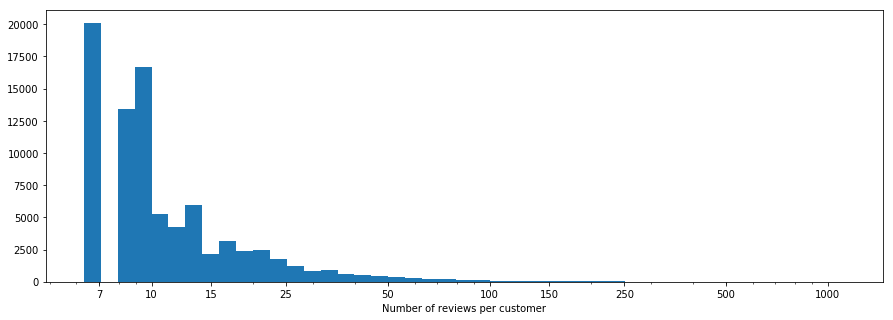

In [447]:
#Log scale.
log_binsize = 0.05
bins = 10 ** np.arange(0.8, np.log10(two_plus[0])+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(two_plus, bins = bins)
plt.xscale('log')
plt.xticks([7e0, 1e1, 1.5e1, 2.5e1, 5e1, 1e2, 1.5e2, 2.5e2, 5e2, 1e3], ['7', '10', '15', '25', '50', '100', '150', '250', '500', '1000'])
plt.xlabel('Number of reviews per customer')
plt.show()

In [448]:
len(two_plus), len(reviews_per_cus)

(168087, 4097672)

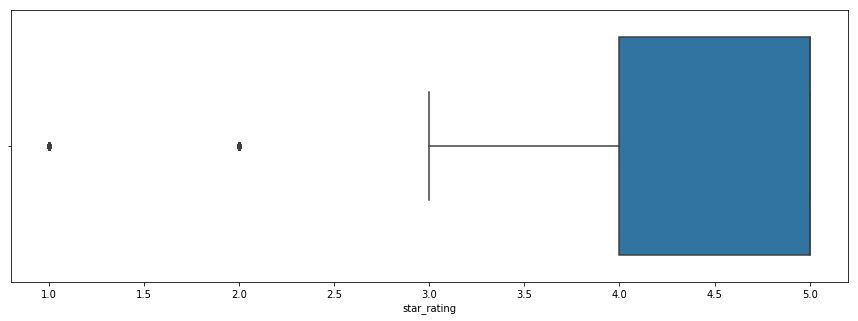

In [339]:
plt.figure(figsize=[15, 5])
ax = sb.boxplot(x=)
ax = sb.boxplot(x=reviews["star_rating"])
ax = sb.boxplot(x=reviews["star_rating"])

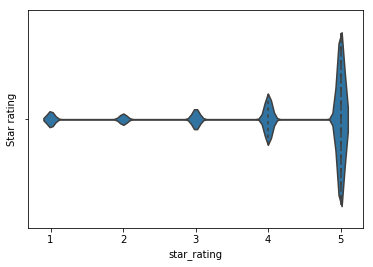

In [390]:
sb.violinplot(x = reviews["star_rating"], inner = 'quartile')
plt.ylabel('Star rating')
plt.show()

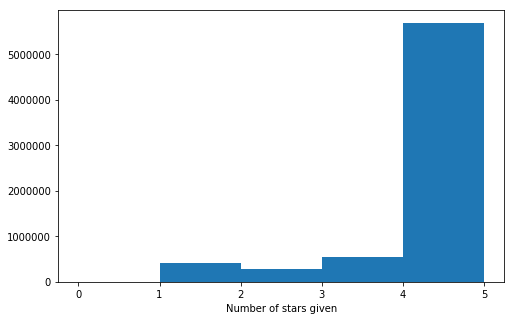

In [386]:
binsize = 1
bins = np.arange(0, reviews.star_rating.max()+binsize, binsize)

#As the first bin has almost 4
plt.figure(figsize=[8, 5])
plt.hist(data=reviews, x="star_rating", bins = bins)
plt.xlabel('Number of stars given')
plt.show()

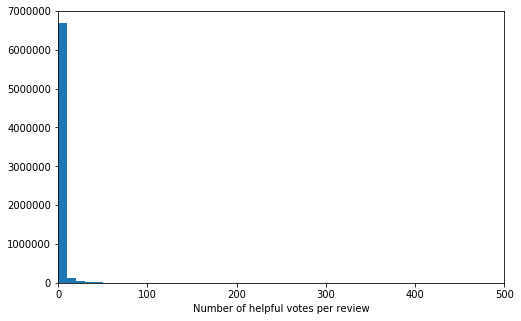

In [382]:
binsize = 10
bins = np.arange(0, reviews.helpful_votes.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=reviews, x="helpful_votes", bins = bins)
plt.ylim(top=7000000)
plt.xlim(left=0, right=500)
plt.xlabel('Number of helpful votes per review')
plt.show()

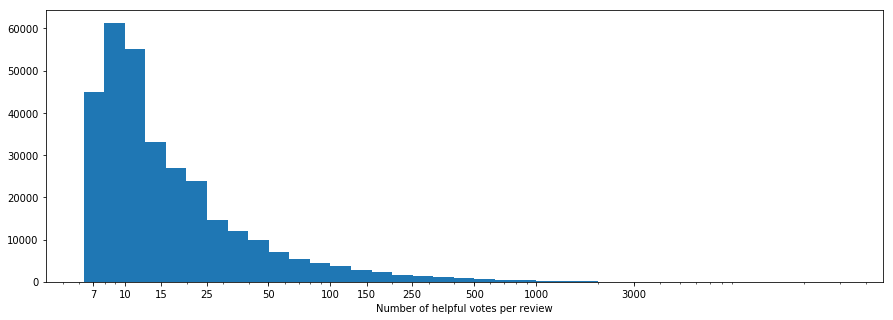

In [383]:
#The above histogram and its bin values show that there's a long tail in the distribution, that goes out quite 
#far so I'll move it to a log scale.
log_binsize = 0.1
bins = 10 ** np.arange(0.8, np.log10(reviews.helpful_votes.max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data=reviews, x="helpful_votes", bins = bins)
plt.xscale('log')
plt.xticks([7e0, 1e1, 1.5e1, 2.5e1, 5e1, 1e2, 1.5e2, 2.5e2, 5e2, 1e3,3e3], ['7', '10', '15', '25', '50', '100', '150', '250', '500', '1000', '3000'])
plt.xlabel('Number of helpful votes per review')
plt.show()

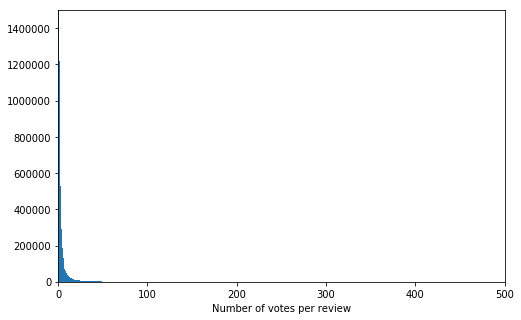

In [384]:
binsize = 1
bins = np.arange(0, reviews.total_votes.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=reviews, x="total_votes", bins = bins)
plt.ylim(top=1500000)
plt.xlim(left=0, right=500)
plt.xlabel('Number of votes per review')
plt.show()

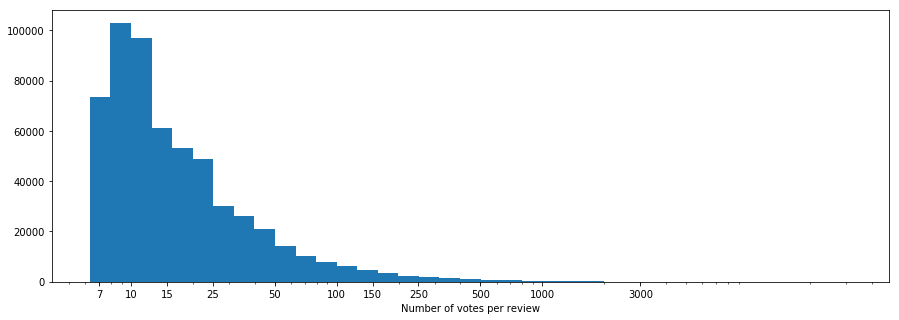

In [385]:
#The above histogram and its bin values show that there's a long tail in the distribution, that goes out quite 
#far so I'll move it to a log scale.
log_binsize = 0.1
bins = 10 ** np.arange(0.8, np.log10(reviews.total_votes.max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data=reviews, x="total_votes", bins = bins)
plt.xscale('log')
plt.xticks([7e0, 1e1, 1.5e1, 2.5e1, 5e1, 1e2, 1.5e2, 2.5e2, 5e2, 1e3,3e3], ['7', '10', '15', '25', '50', '100', '150', '250', '500', '1000', '3000'])
plt.xlabel('Number of votes per review')
plt.show()

In [398]:
print("Value counts for total_votes:", reviews.total_votes.value_counts())
print("Value counts for helpful_votes:", reviews.helpful_votes.value_counts())

Value counts for total_votes: 0       3886466
1       1217546
2        527149
3        288853
4        187879
5        129665
6         93849
7         73356
8         56956
9         45941
10        38212
11        31802
12        26720
13        22934
14        20339
15        17684
16        15564
17        13838
18        12409
19        11226
20         9999
21         9138
22         8454
23         7565
24         7142
25         6554
26         6035
27         5394
28         5221
29         4825
         ...   
1371          1
1346          1
1377          1
1379          1
1381          1
1387          1
1388          1
1390          1
1392          1
1347          1
1345          1
1290          1
1313          1
1292          1
1295          1
1298          1
1300          1
1302          1
1308          1
1309          1
1315          1
1343          1
1317          1
1323          1
1327          1
1329          1
1337          1
1340          1
1341          1
833       

In [417]:
#Number of reviews with 0 votes.
len(reviews[reviews.total_votes == 0])

3886466

In [406]:
reviews[reviews.total_votes >= 1]

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4,0,1,False,False,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
2,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5,1,2,False,False,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
6,53096485,R87VUTMFOE6N,B000002OTL,877615083,Pulp Fiction: Music From The Motion Picture,Music,5,0,1,False,False,Pulp Fiction Soundtrack: EXCELLENT!!!!,Pulp Fiction the movie is one of my favorite m...,1995-11-11
7,53096485,RVS529AN21RR3,6302136105,701401373,The Doors [VHS],Video,5,1,2,False,False,The Doors: The best movie ever,The Doors is one of my favorite movies. Val Ki...,1995-11-11
8,53095748,RG6LPC4W8LN29,0399134204,31287929,The Joy Luck Club,Books,5,0,1,False,False,Gives a deeper understanding of chinese culture.,The book in some way or another gives a deeper...,1995-11-15
10,53092169,R118UFZDTS9K8P,044022165X,511419057,The Rainmaker,Books,5,2,2,False,False,A definite page turner,John Grisham's The Rainmaker keeps you guessin...,1996-05-15
11,53091057,R3M7XTU4Y95NV6,0425107469,50861192,Watchers,Books,5,1,2,False,False,The best book that was ever written by Dean R....,This was my first (I've read all his books!) a...,1996-05-17
12,53092180,R1KLWU5B78FKDR,0880389052,243097701,Homeland (Forgotten Realms),Books,5,1,1,False,False,Homeland is the best book ever!!!!,"I usually don't like TSR books, but Homeland j...",1996-05-17
13,53068480,R1BGW1GTUGJZXJ,0446310786,994527755,To Kill a Mockingbird,Books,5,0,1,False,False,Extraordinary story of courage through a child...,"On the surface, first-person story of a young ...",1996-05-18
14,53092058,R5UI1Q87QAZKH,0385040199,636860937,Anne Frank: Diary of a Young Girl,Books,5,1,1,False,False,How do you review a life?,How do you review a life? Anne Frank was a chi...,1996-05-19


In [405]:
reviews[reviews.helpful_votes >= 1]

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
2,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5,1,2,False,False,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
7,53096485,RVS529AN21RR3,6302136105,701401373,The Doors [VHS],Video,5,1,2,False,False,The Doors: The best movie ever,The Doors is one of my favorite movies. Val Ki...,1995-11-11
10,53092169,R118UFZDTS9K8P,044022165X,511419057,The Rainmaker,Books,5,2,2,False,False,A definite page turner,John Grisham's The Rainmaker keeps you guessin...,1996-05-15
11,53091057,R3M7XTU4Y95NV6,0425107469,50861192,Watchers,Books,5,1,2,False,False,The best book that was ever written by Dean R....,This was my first (I've read all his books!) a...,1996-05-17
12,53092180,R1KLWU5B78FKDR,0880389052,243097701,Homeland (Forgotten Realms),Books,5,1,1,False,False,Homeland is the best book ever!!!!,"I usually don't like TSR books, but Homeland j...",1996-05-17
14,53092058,R5UI1Q87QAZKH,0385040199,636860937,Anne Frank: Diary of a Young Girl,Books,5,1,1,False,False,How do you review a life?,How do you review a life? Anne Frank was a chi...,1996-05-19
15,52152881,R4X9DR0KSYFXD,B000001FBU,880908728,Creatures of the Night,Music,4,1,1,False,False,Kiss' return to hard rock from Disco. One of t...,After briefly visiting the world of Disco and ...,1996-05-20
17,53093609,R3IME3JO53P3EM,0451169514,380266608,It,Books,5,1,1,False,False,One of Stephen King's best books,"I have to say, that when Stephen King wrote th...",1996-05-22
20,53093596,R257996HG776HP,0880793589,676435922,Creative Whack Pack,Books,5,6,11,False,False,Whackiest way to change your life,What's the best way to whack yourself to a mor...,1996-05-26
21,51815472,R16BYP244BVCHV,0783811950,472619578,The Alchemist,Books,5,1,3,False,False,The Alchemist is a book that all ages can enjoy.,I think The Alchemsit is a wonderful story tha...,1996-05-29


In [414]:
len(x[x==2]), len(x[x==1]), len(x[x==3])

(612036, 2999657, 218062)

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [331]:
reviews_per_cus.describe()

AttributeError: 'list' object has no attribute 'describe'

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!